In [30]:
#import libraries
library(bit64)
library(data.table)
library(ggplot2)
library(tree)
library(caret)
library(mlr)

In [31]:
#import data
dataframe = fread("./train_clean.csv", data.table=F)

In [32]:
# check dataset
head(dataframe)
dim(dataframe)

10h.inc,10h.t,10h.td,10h.v,10h.x,10h.y,1h.inc,1h.t,1h.td,1h.v,⋯,min_t.x,min_t.y,min_v,min_v.inc,min_v.t,min_v.td,min_v.v,min_v.x,min_v.y,trajectory_id
0,0.4422049,0.51461806,0,-1.052031,1.6858486,0,0.9147396,0.04208333,0.0004497338,⋯,-1.052031,1.6858486,0,0,0.9147396,0.04208333,0.00000000,-1.7349290,-0.8438713,traj_0000a8602cf2def930488dee7cdad104_1_5
0,0.9056076,0.06293403,0,-1.226989,-0.5728191,0,0.9056076,0.06293403,0.0000000000,⋯,-1.226989,-0.5728191,0,0,0.9056076,0.06293403,0.00000000,-1.2269893,-0.5728191,traj_0000cf177130469eeac79f67b6bcf3df_9_3
0,0.7261458,0.23203125,0,1.235254,1.5517915,0,0.9110243,0.04715278,0.0161257363,⋯,1.235254,1.5517915,0,0,0.9110243,0.04715278,0.01612574,-0.1879482,-2.0368157,traj_0001f97b99a80f18f62e2d44e54ef33d_3_1
0,0.6209722,0.34663194,0,0.573401,0.6522121,1,0.9058333,0.06177083,0.0862978160,⋯,0.573401,0.6522121,0,0,0.6209722,0.34663194,0.00000000,0.5734010,0.6522121,traj_0002124248b0ca510dea42824723ccac_31_10
0,0.8667535,0.07612847,0,-1.761079,-1.2437124,0,0.8843750,0.05850694,0.0148784473,⋯,-1.761079,-1.2437124,0,0,0.8843750,0.05850694,0.01487845,-1.4984550,-1.0658057,traj_0002974025ed311b78ad49904a31d4ea_25_3
0,0.4961111,0.46779514,0,1.624521,0.6535517,0,0.8392361,0.12467014,0.0459571495,⋯,1.624521,0.6535517,0,0,0.6146875,0.34921875,0.00000000,1.6891498,0.5832691,traj_0002e7384d78cd2c2395f63e4b369f40_23_14


[1] 127442     93

In [33]:
# get samples
#set.seed(100)
samp = sample(1:nrow(dataframe), nrow(dataframe)*1)
sam_data = dataframe[samp,]
#sam_data = new_data[samp,]
for_test = dataframe[-samp,]
dim(sam_data)
dim(for_test)

[1] 127442     93

[1]  0 93

In [34]:
#data = sam_data[,!colnames(sam_data) %in% c("label.t")]
data = copy(sam_data)

In [35]:
require(xgboost)

In [36]:
set.seed(100)
train = sample(1:nrow(data), nrow(data)*0.8)
train_data = data[train,]
x.train = train_data[,!names(train_data) %in% c("label.inc","trajectory_id")]
train.traj_id = train_data$trajectory_id
y.train = train_data$label.inc
test_data = data[-train,]
x.test = test_data[,!names(test_data) %in% c("label.inc","trajectory_id")]
test.traj_id = test_data$trajectory_id
y.test = test_data$label.inc

In [37]:
# Reformat for XGboost
x.train.mat <- as.matrix(x.train)
y.train.mat <- as.matrix(y.train)
x.test.mat <- as.matrix(x.test)
y.test.mat <- as.matrix(y.test)

train_data.xgb <- xgb.DMatrix(data=x.train.mat, label=y.train.mat)

In [46]:
# Train first model
xgb.model <- xgboost(data=train_data.xgb, eta= 0.1, max_depth=50,gamma=1, 
                     subsample =0.8, colsample_bytree=0.9, nrounds=80,
                     eval_metric = "error", objective="binary:logistic")

[1]	train-error:0.035928 
[2]	train-error:0.029857 
[3]	train-error:0.025335 
[4]	train-error:0.023364 
[5]	train-error:0.022765 
[6]	train-error:0.021049 
[7]	train-error:0.019725 
[8]	train-error:0.018567 
[9]	train-error:0.017479 
[10]	train-error:0.016694 
[11]	train-error:0.015890 
[12]	train-error:0.014977 
[13]	train-error:0.014144 
[14]	train-error:0.013506 
[15]	train-error:0.012898 
[16]	train-error:0.012280 
[17]	train-error:0.011790 
[18]	train-error:0.011142 
[19]	train-error:0.010760 
[20]	train-error:0.010260 
[21]	train-error:0.009799 
[22]	train-error:0.009181 
[23]	train-error:0.008690 
[24]	train-error:0.008102 
[25]	train-error:0.007572 
[26]	train-error:0.007415 
[27]	train-error:0.006944 
[28]	train-error:0.006503 
[29]	train-error:0.006042 
[30]	train-error:0.005699 
[31]	train-error:0.005355 
[32]	train-error:0.005012 
[33]	train-error:0.004669 
[34]	train-error:0.004492 
[35]	train-error:0.004139 
[36]	train-error:0.003904 
[37]	train-error:0.003580 
[38]	train

[1] "test-error= 0.0560241672878497"


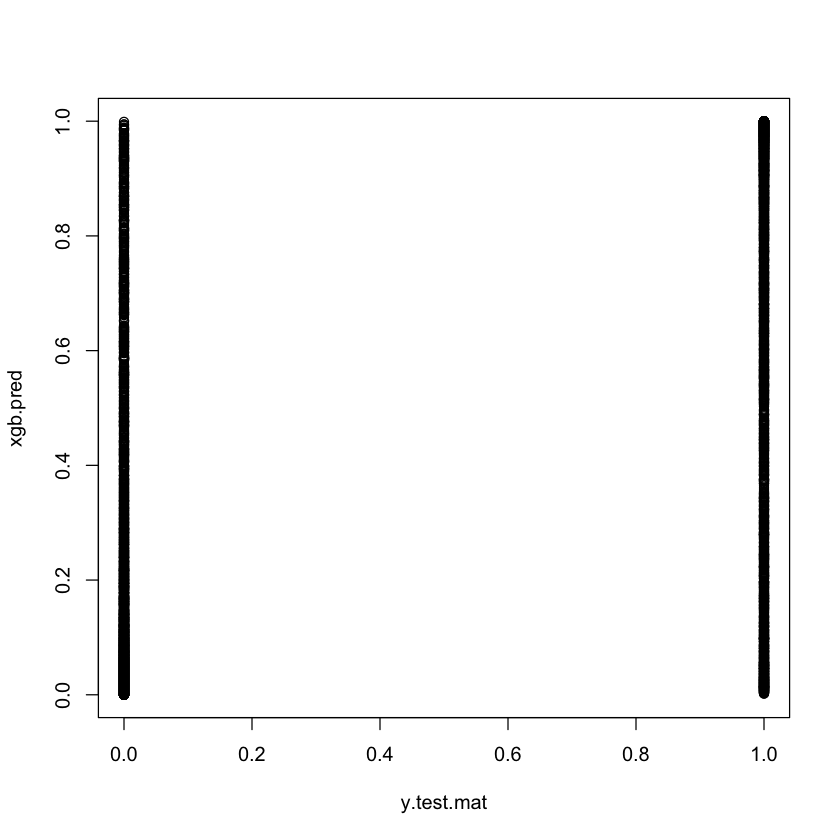

In [47]:
# Make predictions on validation dataset
xgb.pred <- predict(xgb.model, x.test.mat)
error <- mean(as.numeric(xgb.pred > 0.5) != y.test.mat)
print(paste("test-error=", error))

plot(y.test.mat, xgb.pred)

### output some scores to view performance of model

In [40]:
xgb.pred_df <- predict(xgb.model, x.test.mat)
xgb.pred_df = data.frame(prediction=round(xgb.pred_df), actual=y.test, x=y.test==round(xgb.pred_df))
#colnames(xgb.pred_df) = levels(y.test)
xgb.pred_df$x = as.integer(as.logical(xgb.pred_df$x))

#xgb.pred_df

In [41]:
table(xgb.pred_df$actual, xgb.pred_df$prediction)

   
        0     1
  0 18065   515
  1   910  5999

In [388]:
table(xgb.pred_df$actual, xgb.pred_df$prediction)

   
        0     1
  0 18138   504
  1   900  5947

In [42]:
sum(xgb.pred_df$x)/nrow(xgb.pred_df)

[1] 0.9440935

In [43]:
library(MLmetrics)


Attaching package: ‘MLmetrics’

The following objects are masked from ‘package:caret’:

    MAE, RMSE

The following object is masked from ‘package:base’:

    Recall



In [48]:
F1_Score(y_true=xgb.pred_df$actual, y_pred=xgb.pred_df$prediction)

[1] 0.9620557

In [45]:
xgb.pred_df;

prediction,actual,x
0,0,1
0,0,1
0,0,1
0,0,1
1,1,1
1,1,1
0,0,1
0,0,1
1,1,1
0,0,1


In [ ]:
importance_matrix <- xgb.importance(model=xgb.model)
print(importance_matrix)
xgb.plot.importance(importance_matrix=importance_matrix)

### Hyper parameter tuning

In [ ]:
# specify cross-validation method and number of folds and enable parallel computation
xgb_trcontrol <- trainControl(method="cv",
                             number = 5,
                             allowParallel = TRUE,
                             verboseIter = FALSE,
                             returnData = FALSE,
                             classProbs=T,
                             summaryFunction=twoClassSummary)

# Grid space to search for best hyperparameters
xgbGrid <- expand.grid(nrounds = 100,
                      max_depth = c(5, 15, 20),
                      colsample_bytree = c(0.2,0.5,1),
                      eta = c(0.5, 0.1, 0.01),
                       gamma= c(0,2,4),
                      subsample = 0.8,
                      min_child_weight=1)

# Train model
xgb_model_tuned = caret::train(x=x.train.mat, y=y_train, 
                        trControl = xgb_trcontrol,
                       tuneGrid = xgbGrid,
                       method= "xgbTree",
                               metric="ROC")

## Test

In [397]:
# import test_data
test_df <- fread("./test_clean.csv", data.table=F)
test_data = test_df
x.test = test_data[,!names(test_data) %in% c("label.inc","trajectory_id")]
test.traj_id = test_data$trajectory_id
x.test.mat <- as.matrix(x.test)

In [398]:
# make predictions on test data with tuned model and prepare for submisison
xgb.test_pred <- predict(xgb.model_tuned, x.test.mat)
xgb.test_pred <- data.frame(id=test.traj_id, 
                            target=round(xgb.test_pred))

xgb.test_pred

id,target
traj_00032f51796fd5437b238e3a9823d13d_31_5,0
traj_000479418b5561ab694a2870cc04fd43_25_10,0
traj_000506a39775e5bca661ac80e3f466eb_29_5,1
traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,0
traj_00063a4f6c12e1e4de7d876580620667_3_4,0
traj_0006535be25bb52dd06983447880c964_5_12,0
traj_0006f84bb33ec929d1cda7686f861d0a_31_3,1
traj_00093ae562586aed0e053b8431e8ace4_23_10,0
traj_000c739e444a70e1804d757a0580caaa_31_3,1
traj_000d479078af08618bddc7f09082b8c3_11_6,0


In [400]:
# Write results to file
write.csv(xgb.test_pred, file="submission.csv", row.names=F)

# PCA 

In [119]:
# Trying out some PCA to analyse dataset
pca_data = copy(dataframe)
pca_data = pca_data[,!names(pca_data) %in% c("trajectory_id")]

In [120]:
head(pca_data)

10h.inc,10h.t,10h.td,10h.v,10h.x,10h.y,1h.inc,1h.t,1h.td,1h.v,⋯,min_t.v,min_t.x,min_t.y,min_v,min_v.inc,min_v.t,min_v.td,min_v.v,min_v.x,min_v.y
0,0.4422049,0.51461806,0,-1.052031,1.6858486,0,0.9147396,0.04208333,0.0004497338,⋯,0,-1.052031,1.6858486,0,0,0.9147396,0.04208333,0.000000,-1.7349290,-0.8438713
0,0.9056076,0.06293403,0,-1.226989,-0.5728191,0,0.9056076,0.06293403,0.0000000000,⋯,0,-1.226989,-0.5728191,0,0,0.9056076,0.06293403,0.000000,-1.2269893,-0.5728191
0,0.7261458,0.23203125,0,1.235254,1.5517915,0,0.9110243,0.04715278,0.0161257363,⋯,0,1.235254,1.5517915,0,0,0.9110243,0.04715278,6.266577,-0.1879482,-2.0368157
0,0.6209722,0.34663194,0,0.573401,0.6522121,1,0.9058333,0.06177083,0.0862978160,⋯,0,0.573401,0.6522121,0,0,0.6209722,0.34663194,0.000000,0.5734010,0.6522121
0,0.8667535,0.07612847,0,-1.761079,-1.2437124,0,0.8843750,0.05850694,0.0148784473,⋯,0,-1.761079,-1.2437124,0,0,0.8843750,0.05850694,5.781871,-1.4984550,-1.0658057
0,0.4961111,0.46779514,0,1.624521,0.6535517,0,0.8392361,0.12467014,0.0459571495,⋯,0,1.624521,0.6535517,0,0,0.6146875,0.34921875,0.000000,1.6891498,0.5832691


In [121]:
colnames(pca_data)

[1] "10h.inc"   "10h.t"     "10h.td"    "10h.v"     "10h.x"     "10h.y"    
 [7] "1h.inc"    "1h.t"      "1h.td"     "1h.v"      "1h.x"      "1h.y"     
[13] "2h.inc"    "2h.t"      "2h.td"     "2h.v"      "2h.x"      "2h.y"     
[19] "3h.inc"    "3h.t"      "3h.td"     "3h.v"      "3h.x"      "3h.y"     
[25] "4h.inc"    "4h.t"      "4h.td"     "4h.v"      "4h.x"      "4h.y"     
[31] "5h.inc"    "5h.t"      "5h.td"     "5h.v"      "5h.x"      "5h.y"     
[37] "6h.inc"    "6h.t"      "6h.td"     "6h.v"      "6h.x"      "6h.y"     
[43] "7h.inc"    "7h.t"      "7h.td"     "7h.v"      "7h.x"      "7h.y"     
[49] "8h.inc"    "8h.t"      "8h.td"     "8h.v"      "8h.x"      "8h.y"     
[55] "9h.inc"    "9h.t"      "9h.td"     "9h.v"      "9h.x"      "9h.y"     
[61] "avg_t"     "avg_v"     "avg_x"     "avg_y"     "label.inc" "label.t"  
[67] "max_t.inc" "max_t.t"   "max_t.td"  "max_t.v"   "max_t.x"   "max_t.y"  
[73] "max_v"     "max_v.inc" "max_v.t"   "max_v.td"  "max_v.v"   "max_v.x"  
[79] "max_v.y"   "min_t.inc" "min_t.t"   "min_t.td"  "min_t.v"   "min_t.x"  
[85] "min_t.y"   "min_v"     "min_v.inc" "min_v.t"   "min_v.td"  "min_v.v"  
[91] "min_v.x"   "min_v.y"

In [122]:
data.frame(means=apply(pca_data, 2, mean), var=apply(pca_data, 2, var))

,means,var
10h.inc,0.1987884685,0.159272863
10h.t,0.4979214468,0.037177880
10h.td,0.4662003376,0.037690941
10h.v,0.0090671162,0.002950240
10h.x,-0.0212589284,1.174931978
10h.y,0.0420940025,1.319701906
1h.inc,0.2888686618,0.205425170
1h.t,0.9213327998,0.001626688
1h.td,0.0427889845,0.001245364
1h.v,0.0207019559,0.003797704


In [124]:
pr.out = prcomp(pca_data)

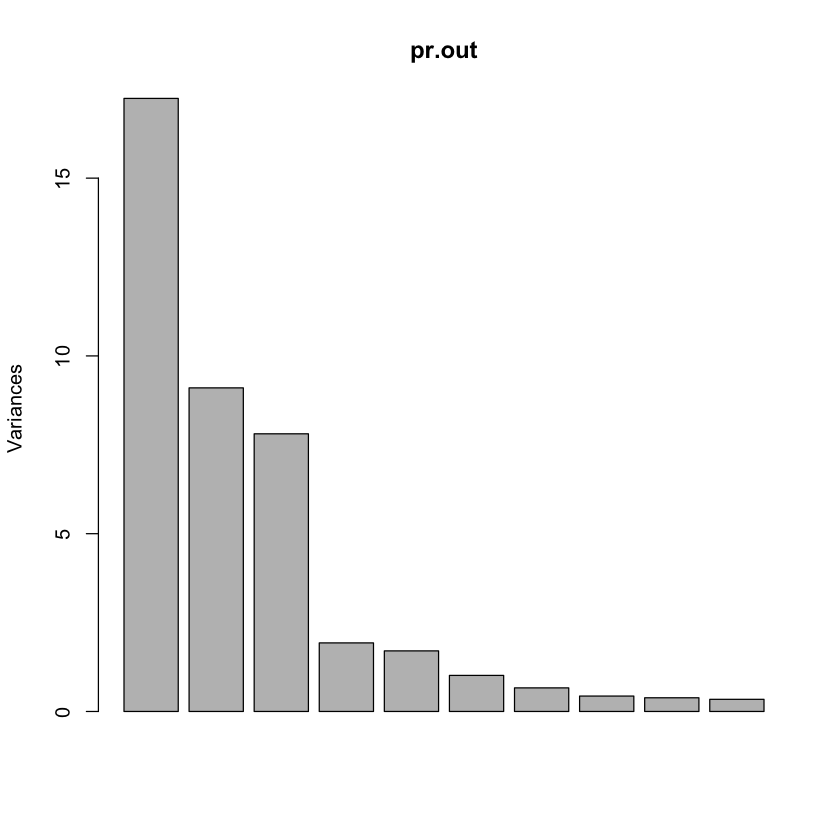

In [125]:
plot(pr.out)

In [126]:
# get the proportion of variance explained by the principal components
# this is equal to the inidiviual variance explained by each PC divided
# the sum of the total variance

pr.var = pr.out$sdev^2
pve = pr.var / sum(pr.var)
data.frame(Principal_Comp = seq(1:length(pve)), variance_explained=pve, cumsum(pve))

Principal_Comp,variance_explained,cumsum.pve.
1,0.390119479,0.3901195
2,0.205917178,0.5960367
3,0.176684072,0.7727207
4,0.043632337,0.8163531
5,0.038551915,0.8549050
6,0.022951477,0.8778565
7,0.015008920,0.8928654
8,0.009802662,0.9026680
9,0.008709597,0.9113776
10,0.007730422,0.9191081


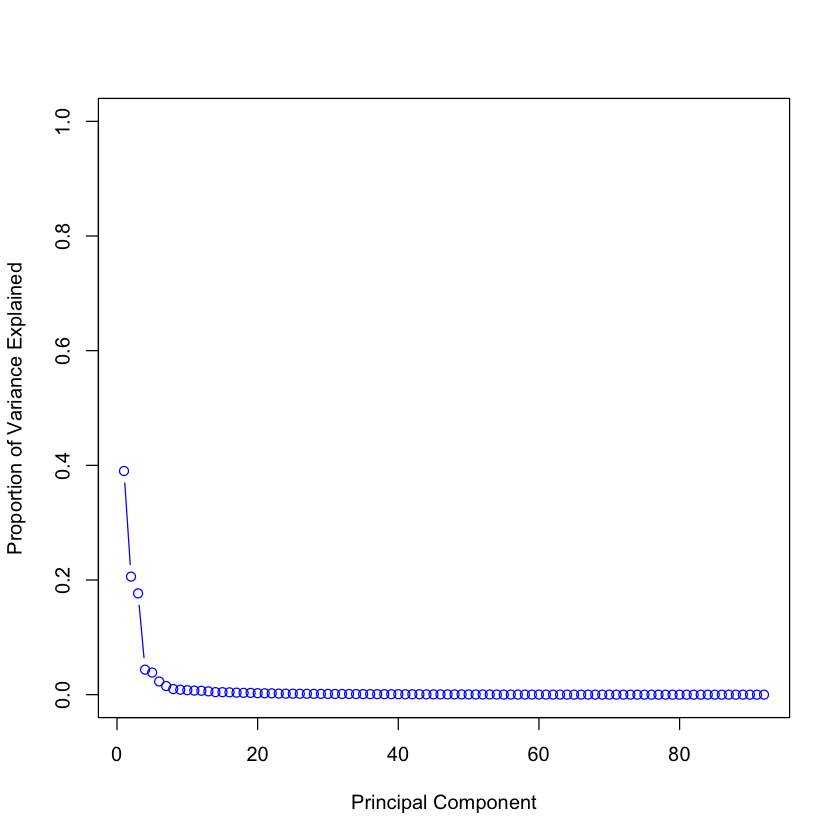

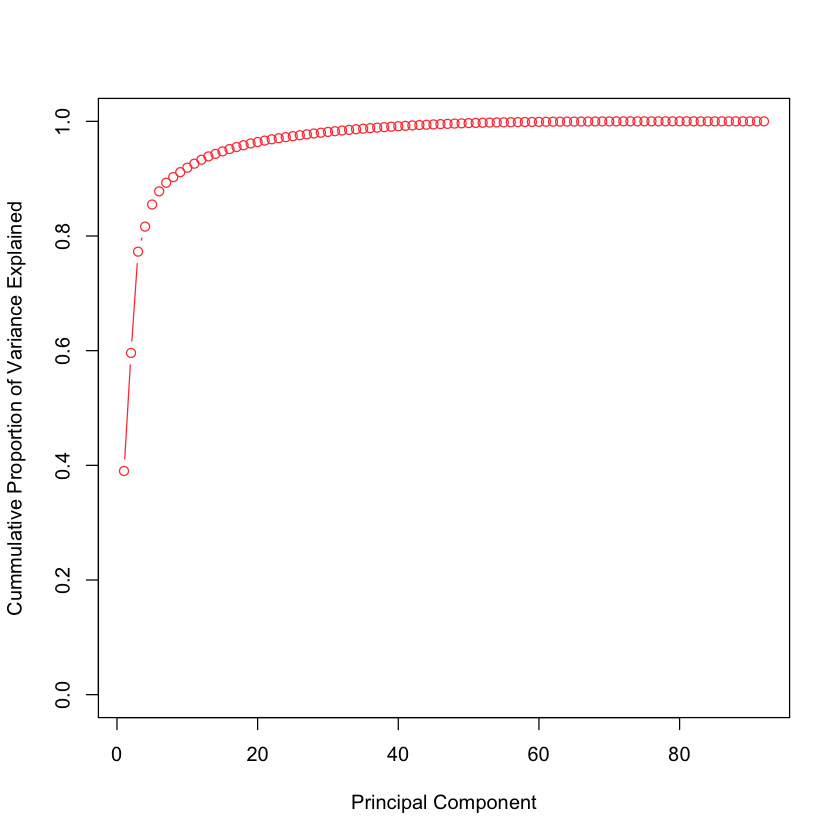

In [127]:
# plot proportion of variability explained
#par(mfrow=c(2,1))
plot(pve, xlab='Principal Component', ylab="Proportion of Variance Explained",
    ylim=c(0,1), type='b', col="blue")

# plot cummulative proportions explained
plot(cumsum(pve), xlab='Principal Component', ylab="Cummulative Proportion of Variance Explained",
    ylim=c(0,1), type='b', col="brown1")